# Lab 2.

## 2. a)

In [53]:
import random
#trajektoria to oczywiście funkcja czasu będziemy, więc zwracali funkcję
def generate_pois_trajectory(l=1, domain_upper_limit=1000):
    jump_times = []
    while(True):
        interval = random.expovariate(l)
        if not jump_times:
            jump_times.append(interval)
        else:
            if jump_times[-1] + interval < domain_upper_limit:
                jump_times.append(interval + jump_times[-1])
            else:
                break
    def trajectory(x):
        if x<0 or x>=domain_upper_limit:
            return 0
        jumps_occured = 0
        while(jump_times[jumps_occured] < x):
            jumps_occured += 1
        return jumps_occured
    return trajectory
    

Text(0.5, 1.0, 'Poisson process with intensity l=5 trajectory')

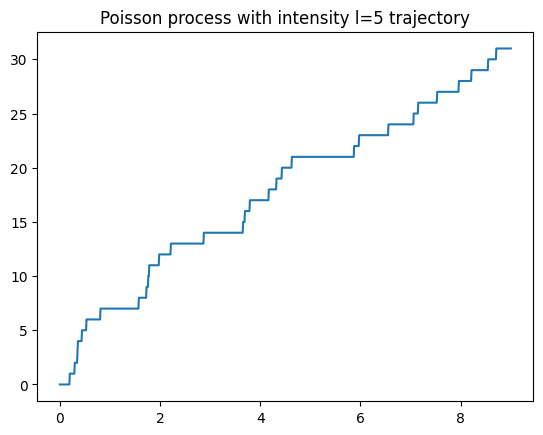

In [54]:
import matplotlib.pyplot as plt
import numpy as np
l=5
pois_trajectory = generate_pois_trajectory(l, 10)
pois_trajectory_vectorised = np.vectorize(pois_trajectory)
x = np.linspace(0, 9, 1000)
y = pois_trajectory_vectorised(x)
plt.plot(x,y)
plt.title(f"Poisson process with intensity l={l} trajectory")

## 2. b)

### 1. Metoda (chyba) bardziej intuicyjna 

In [112]:
import math
#tutaj już zwrócimy zwykłego arraya bo sami ustalamy, gdzie chcemy znać wartości
def generate_wiener_trajectory1(T=100, npoints = 1000):
    dt = T/(npoints - 1)
    sigma = math.sqrt(dt)
    increments = np.random.normal(0, sigma, npoints-1)
    increments = np.insert(increments, 0, 0.0)
    trajectory = np.cumsum(increments)
    times = np.linspace(0, T, npoints)
    trajectory = np.vstack((times, trajectory))
    return trajectory
    
    

Text(0.5, 1.0, 'Standard Wiener process')

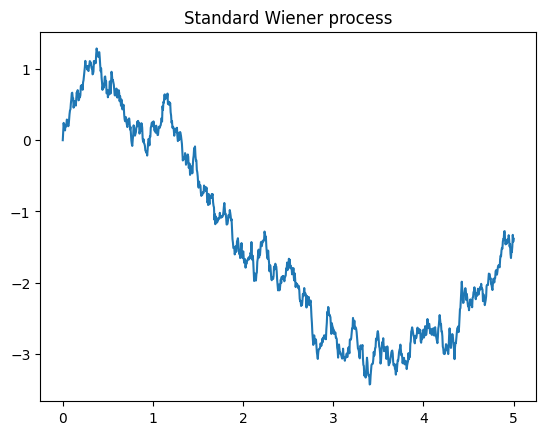

In [113]:
trajectory = generate_wiener_trajectory1(5)
x = trajectory[0]
y = trajectory[1]
plt.plot(x,y)
plt.title("Standard Wiener process")

### 2. Metoda (chyba) mniej intuicyjna

In [120]:
def cholesky(S): #S - macierz kwadratowa dodatnio okreslona
    n = len(S)
    L = [[0.0] * n for i in range(n)]
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            if (i == k):
                L[i][k] = math.sqrt(S[i][i] - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (S[i][k] - tmp_sum))
    return np.array(L)

def generate_wiener_trajectory2(T=100, npoints=1000):
    times = np.linspace(0,T,npoints)
    sigma = np.zeros((npoints-1, npoints-1), dtype=float)
    for i in range(npoints-1):
        time = times[i+1]
        for j in range(i, npoints-1):
            sigma[i][j] = time
            sigma[j][i] = time
    A = cholesky(sigma)
    normal_vector = np.random.normal(0,1, npoints-1)
    values = np.dot(A, normal_vector)
    values = np.insert(values, 0 , 0.0)
    trajectory = np.vstack((times, values))
    return trajectory
    
        

Text(0.5, 1.0, 'Standard Wiener process')

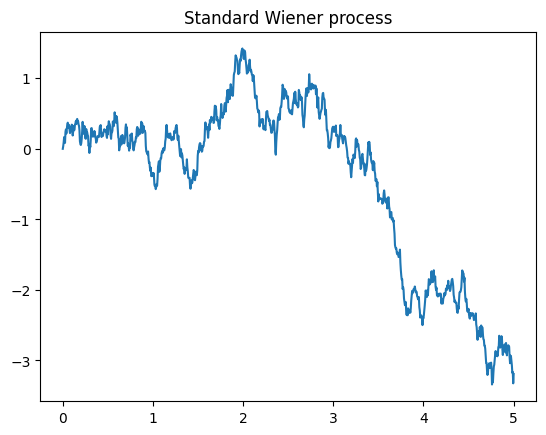

In [122]:
trajectory = generate_wiener_trajectory2(5)
x = trajectory[0]
y = trajectory[1]
plt.plot(x,y)
plt.title("Standard Wiener process")

### porównanie prędkości

In [123]:
import time
start_time = time.time()
for i in range(100):
    generate_wiener_trajectory1()
end_time = time.time()
avg = (end_time-start_time)/100
print(f"Average execution time for first method {avg}")

start_time = time.time()
for i in range(100):
    generate_wiener_trajectory2()
end_time = time.time()
avg = (end_time-start_time)/100
print(f"Average execution time for second method {avg}")
#ta pierwsza nieco szybsza

Average execution time for first method 3.7531852722167966e-05
Average execution time for second method 16.860368013381958
